# Previsão de sobrevivencia dos passageiro do navio Titanic

### Introdução
Esta competição tem como intuito a previsão da sobrevivência dos passageiros a bordo do navio Titanic, usando técnicas de machine learning.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
arquivo = 'dados/train.csv'
df = pd.read_csv(arquivo)

In [5]:
# visualizar dados
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Selecionando as colunas


In [6]:
df = df[['Survived','Pclass','Sex','Age','SibSp', 'Parch','Fare','Embarked']]

KeyError: "['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'] not in index"

## Hipotes:
* A cabine pode influenciar? Pensando que as cabines ao fundo do navio seria mais difícil sair do navio
* O Sexo e idade pode influenciar ? (crianças e mulheres primeiro ?)
* A classe do passageiro influiencia ?
* Se o pasageiro esta acompanhado por um parente

## Como avaliar isso ?
Comparando o numero de sobrevivencia com as colunas, por exemplo (Pclass, Sex, Age, Parch, fare, cabin, Embarked).
Criando perguntas como: qual o numero de sobrevivênte mulher e homen ?

## Cuidados 
Como, por exemplo, o número pode mostrar que a maior quantidade de passageiro que sobreviveu tinha por volta de 20 a 25 anos
sendo assim é importante saber quantos passageiros possuíam essa idade e também a quantidade de homens e mulheres.
para não ser uma correlaxão 

### Com base nesta analise quais as colunas importantes ?

## Tratamento dos dados
* Sex -> (female = 0, male= 1)
* Embarked -> (C=0, Q=1, S=2)

In [ ]:
# Conseveter string em valor numerico (female=0, male=1)
aux_val_sex = []
for i in df['Sex']:
    if i == 'female': 
        aux_val_sex.append(0)
    else:
        aux_val_sex.append(1)
    

In [ ]:
# Conserter string em valor numerico (C=0, Q=1, S=2)
aux_val_embarked = []
for i in df['Embarked']:
    if i == 'C':
        aux_val_embarked.append(0)
    elif i == 'Q':
        aux_val_embarked.append(1)
    else:
        aux_val_embarked.append(2)

In [7]:
print(aux_val_embarked[:10])

NameError: name 'aux_val_embarked' is not defined

In [64]:
print(aux_val_sex[:10])

[1, 0, 0, 0, 1, 1, 1, 1, 0, 0]


In [66]:
df['Sex'] = aux_val_sex
df['Embarked'] = aux_val_embarked

In [67]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [44]:
# remover dados faltantes
df = df.dropna(axis=0)

In [45]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


# Analise dos dados

<AxesSubplot:xlabel='Sex'>

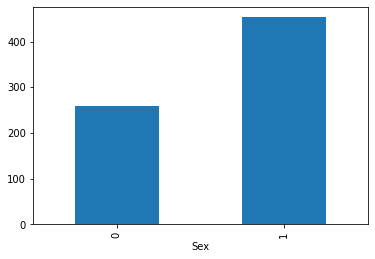

In [46]:
count = df.groupby('Sex')['Survived'].count()
count.plot(kind='bar')

In [47]:
tamanho_conjunto = len(df)
Sex_f = df[df['Sex']=='female']
Sex_m = df[df['Sex']=='male']
Survived_total = df[df['Survived']==1]


# Numero de mulher a bordo
num_mulher = len(Sex_f)

# Numero de homen a bordo
num_homen = len(Sex_m)

# Numero de sobrevivente
num_survived = len(Survived_total)

print(f'Conjunto:{tamanho_conjunto}')
print(f'Sobreviventes:{num_survived}')
print(f'Mulheres:{num_mulher}')
print(f'Homens: {num_homen}')


Conjunto:712
Sobreviventes:288
Mulheres:0
Homens: 0


In [48]:
num_embark = df.groupby('Embarked')['Survived'].count()

<AxesSubplot:xlabel='Embarked'>

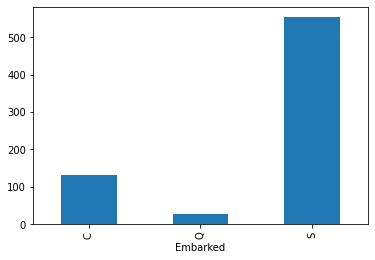

In [49]:
num_embark.plot(kind='bar')